# Let's play with all undirected graphs of size n=7

( This is done using my sage310 or kerasenv3.10.6 environment )

In [2]:
%matplotlib inline

import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
#import tensorflow as tf
import time
from sklearn.decomposition  import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn as sk
import random
import pprint

#from spectrum_utils import *
import numpy as np
import warnings
#warnings.simplefilter('ignore')


rand_state = 42
#tf.random.set_seed(rand_state)
np.random.seed(rand_state)

kcorre_names = ( '1orbit-2-corre-dict', '1orbit-3-corre-dict', '1orbit-4-corre-dict', '1orbit-5-corre-dict', '1orbit-6-corre-dict', "1orbit-7-corre-dict" ) 


In [3]:
def PCA_everything(dataset, ncomponents):
    pca = PCA(n_components= ncomponents)
    return pca.fit_transform(dataset)


def clean_it(skew_spectra):
    return  np.round(skew_spectra, decimals=6)

def make_example(kcorrelation, stop_at_length=None):

    if stop_at_length:
        indices = list(range(len(kcorrelation[:stop_at_length])))    # limit here the size of the final tree, i.e. the number of grpahs we consider
    else:
        indices = list(range(len(kcorrelation)))

    newlist =  []

    for i in indices:
        newlist.append(kcorrelation[i])

    random.Random(4).shuffle(indices)

    for i in indices:
        newlist.append(kcorrelation[i])

    print("len of newlist", len(newlist))
    return np.array(newlist)

In [4]:
handle = open('megadump-atlas_7.pickle', 'rb')
megadataset = pickle.load(handle)


newdataset = {}

# !!!!!!!!!!!!!!!!!! 
# this creates collisions in the skew spectras
#for kcorre_name in kcorre_names:
#   newdataset[kcorre_name]=make_example(megadataset[1][kcorre_name], stop_at_length=10)

# alternative
newdataset = megadataset[1]


# !!!!!!!!!!!!!!!!!! 
# newdataset = {}
# this creates collisions in the skew spectras
#for kcorre_name in kcorre_names:
#   newdataset[kcorre_name]=make_example(megadataset[1][kcorre_name], stop_at_length=10)

# alternative
#print(megadataset[0][1].number_of_nodes())

#indices = [i for i,graph in enumerate(megadataset[0]) if graph.number_of_nodes() == 7 ]

#indices = indices[:-5]
# print(indices)
#print(megadataset[1])
#newdataset = {superkey : [megadataset[1][superkey][i] for i in indices] for superkey in kcorre_names}
#asdf = [megadataset[1]['1orbit-6-corre-dict'][i] for i in indices]

#print(indices)
#print(len(megadataset[1]['1orbit-6-corre-dict']))

In [5]:
# Are you sure you want to run this? Very slow. 
def create_T_table_2(k_correlations):
    T_sets = {}

    for kcorre_name in kcorre_names:
        T_sets[kcorre_name]=[]
        indices = set(range(len(k_correlations[kcorre_name])))
        #print("indices", indices)

        dista = sk.metrics.pairwise_distances(k_correlations[kcorre_name])

        while True:
            row = random.choice(list(indices))


            #agiowhere = np.where(
            #    np.isclose(dista[row], np.zeros(len(dista[row])))
            #    )
            #print(list(agiowhere[0]))
            group = set(np.where(
                np.isclose(dista[row], np.zeros(len(dista[row])))
                )[0]           )
            print("group:", group, end=' ')
            T_sets[kcorre_name].append(group)
            indices = indices - group

            if len(indices)==0:
                print("Finished clustering!")
                break
            else:
                print(len(indices), end=', ')

    return T_sets   


##### TRIGGER LENTEZZA!!!
#T_test = create_T_table_2(newdataset)



In [7]:


def create_T_table(k_correlations):
    T_tmp = {}
    T_sets = {}

    for kcorre_name in kcorre_names:

        T_tmp[kcorre_name]={}

        # Iterate through the skew_spectra and populate the dictionary
        for index, vector in enumerate(k_correlations[kcorre_name]):
            #print(index)
            # Convert the vector to a tuple to use it as a dictionary key :) 
            vector_tuple = tuple(vector)

            if vector_tuple in T_tmp[kcorre_name]:
                # If the vector representation exists in the dictionary, append the index
                T_tmp[kcorre_name][vector_tuple].append(index)
            else:
                # Oth.. create a new entry with the index
                T_tmp[kcorre_name][vector_tuple] = [index]

        # Finally, convert the dictionary values to sets
        T_sets[kcorre_name] = [set(indices) for indices in T_tmp[kcorre_name].values()]
    return T_sets


T = create_T_table(newdataset)

#print(T['1orbit-2-corre-dict'])
# pprint.pprint(T['1orbit-3-corre-dict'])
# pprint.pprint(T['1orbit-4-corre-dict'])
# pprint.pprint(T['1orbit-5-corre-dict'])

#print(len(T['1orbit-2-corre-dict']))

In [6]:
# pprint.pprint(T)
# pprint.pprint(T_test)

# for kcorre_name in kcorre_names:
#     converted_list = [list(s) for s in T_test[kcorre_name] ]

#     print(set(T_test[kcorre_name]))
#     if set(T_test[kcorre_name] == set(T[kcorre_name])):
#         print("ok")

In [8]:
G = nx.DiGraph()
G.add_node((0,0))

breakout = False

for k in range(6, 1, -1):
    #print(k)
    for subsetz in T['1orbit-{}-corre-dict'.format(k+1)]:
        for setz in T['1orbit-{}-corre-dict'.format(k)]:
            #print("k:", k, "subset", subsetz, "set:", setz, "k:", k)


            for node in subsetz:                
                if {node}.issubset(setz):
                    G.add_edge((k, ) + tuple(setz), (k+1,) + tuple(subsetz) )
                else:
                    pass 
                    #G.add_node( (k+1,) + tuple(subsetz)  )
                    #print("anomaly detected")
           

for setz in T['1orbit-2-corre-dict']:
    G.add_edge((0,0), (2,) + tuple(setz))


## Let's find nodes or edges that are not linked to the main tree.

In [9]:
main_G = nx.bfs_tree(G, (0,0))
print(G.number_of_nodes(), main_G.number_of_nodes())
print(G.number_of_edges(), main_G.number_of_edges())


5623 5623
5925 5622


In [10]:
from random import choice

Gclone = G.copy()
for node in main_G:
    Gclone.remove_node(node)

try:
    random_node = choice(list(Gclone.nodes))
    print(random_node)
except Exception as e:
    print(e)

list index out of range


In [11]:
from random import choice

Gclone_edges = G.copy()
for edge in main_G.edges():
    Gclone_edges.remove_edge(*edge)

# try:
#     random_node = choice(list(Gclone_edges.nodes))
#     print(random_node)
# except Exception as e:
#     print(e)

print(len(Gclone_edges.edges()))
pprint.pprint(Gclone_edges.edges())


303
OutEdgeView([((6, 6), (7, 0, 1, 2, 3, 514, 5, 6, 7, 8, 521, 10, 11, 12, 13, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 45, 50, 52, 54, 57, 58, 59, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 75, 77, 79, 80, 95, 99, 102, 103, 110, 113, 116, 118, 123, 125, 128, 131, 132, 133, 135, 138, 139, 141, 142, 144, 665, 161, 169, 183, 187, 196, 202, 207, 218, 219, 222, 225, 231, 232, 233, 235, 236, 239, 240, 263, 798, 298, 316, 333, 341, 349, 356, 362, 364, 369, 372, 458, 461, 499)), ((6, 10), (7, 0, 1, 2, 3, 514, 5, 6, 7, 8, 521, 10, 11, 12, 13, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 45, 50, 52, 54, 57, 58, 59, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 75, 77, 79, 80, 95, 99, 102, 103, 110, 113, 116, 118, 123, 125, 128, 131, 132, 133, 135, 138, 139, 141, 142, 144, 665, 161, 169, 183, 187, 196, 202, 207, 218, 219, 222, 225, 231, 232, 233, 235, 236, 239, 240, 263, 798, 298, 316, 333, 341, 349, 356, 362, 364, 369, 372, 458, 461, 499)), ((6,

What we say before is very sad... :( 
    OutEdgeView([((4, 814), (5, 67, 814))

## Let's plot the tree! 

In [11]:
# def position_of_nodes(G):
#     #pos = nx.spring_layout(G, seed=10)

#     total_nodes = list(G.nodes())


#     #pprint.pprint(total_nodes)

#     k = 10
#     for n in total_nodes:
#         cc = nx.bfs_tree(G, n)
 
#         k = k + 1
#         for node in cc:
#             #print(node)
#             pos[node] = np.array([k, node[0]])
#             total_nodes.remove(node)

#     # handle remaining nodes
#     pass
#     #print("\n\n")
#     #pprint.pprint(pos)

#     return pos


In [12]:
# pos = nx.spring_layout(main_G, iterations=300)
# #pos=position_of_nodes(G)

# plt.figure(figsize=(85,85)) 

# nx.draw(main_G, pos,  with_labels=True, font_size=8)

In [13]:

# pos = nx.spring_layout(G, iterations=150)
# #pos=position_of_nodes(G)

# plt.figure(figsize=(50,50)) 

# nx.draw(main_G,pos,  with_labels=True, font_size=8)


# print("\n\n\n")

## We want to check that increasing k for a k-correlation is losing power. 


In [12]:
print(nx.is_directed_acyclic_graph(main_G))
print(nx.is_tree(main_G))

print(nx.is_directed_acyclic_graph(G))
print(nx.is_tree(G))

True
True
True
False


### Let's play the lottery ticket.
In practice we are searching for graphs that we can discriminate by using k correlation for k> 2

In [13]:
def count_bifurcations(grafetto):
    histogram = {kcorre_name : 0 for kcorre_name in kcorre_names}
    histogram['1orbit-0-corre-dict'] = 0
    hits = []
    lottery_tickets = []
    for node in grafetto.nodes():
        if grafetto.out_degree(node)>1:
            histogram['1orbit-{}-corre-dict'.format(node[0])] +=  grafetto.out_degree(node)  # is this right? consider {1,2,3,4} -> {1,2,3}, {4} or {1,2,3,4} -> {1,2}, {3}, 
            hits.append(node)
            if node[0] > 2:      # we can distinguish graphs in this node in the NEXT k of correlation
                lottery_tickets.append(node)
    return histogram, hits, lottery_tickets

histogram, hits, lottery_tickets = count_bifurcations(main_G)       

pprint.pprint(histogram)
print("We have {} lottery tickets! (graphs we distinguish with skew spectra of size k>3)".format(len(lottery_tickets)))
print(lottery_tickets)
print("Recall the number of nodes is ", main_G.number_of_nodes())
print("Recall the number of graphs is ", len(megadataset[0]))
lottery_ticket = random.choice(lottery_tickets)


{'1orbit-0-corre-dict': 726,
 '1orbit-2-corre-dict': 500,
 '1orbit-3-corre-dict': 4,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}
We have 2 lottery tickets! (graphs we distinguish with skew spectra of size k>3)
[(3, 417, 419), (3, 555, 556)]
Recall the number of nodes is  5623
Recall the number of graphs is  1044


In [28]:
sfortunelli = []
for node in main_G:
    if node[0] == 6:
        if len(node) > 2:
            sfortunelli.append(node)

print(sfortunelli)
sfortunelli.pop()
print(sfortunelli)

[(6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61), (6, 32, 39)]
[(6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61)]


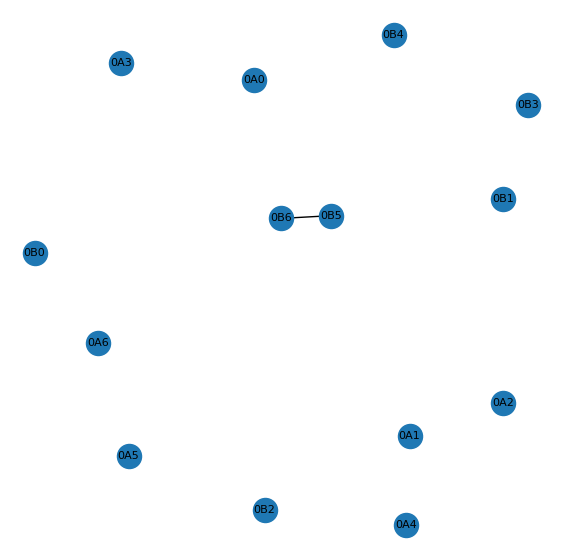

In [30]:
fig, axs = plt.subplots(nrows=len(sfortunelli), figsize=(7, 7*len(sfortunelli)))
for i, ticket in enumerate(sfortunelli):
    newgraph = nx.union(megadataset[0][ticket[1]], megadataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=20)
    #plt.figure(figsize=(7,7)) 
    #axs[i].imshow()
    nx.draw(newgraph, pos,  with_labels=True, font_size=8)

# SAD FACT: 1044 > 500+726. 

# Let's see if all the leaves have only one entry in the label

In [42]:
leaves = [x for x in main_G.nodes() if main_G.out_degree(x)==0]
non_separated_leaves = [x for x in main_G.nodes() if main_G.out_degree(x)==0 and len(x) > 2]
print(non_separated_leaves)
print(len(non_separated_leaves))

print(non_separated_leaves[0])

[(7, 0, 1, 2, 3, 514, 5, 6, 7, 8, 521, 10, 11, 12, 13, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 45, 50, 52, 54, 57, 58, 59, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 75, 77, 79, 80, 95, 99, 102, 103, 110, 113, 116, 118, 123, 125, 128, 131, 132, 133, 135, 138, 139, 141, 142, 144, 665, 161, 169, 183, 187, 196, 202, 207, 218, 219, 222, 225, 231, 232, 233, 235, 236, 239, 240, 263, 798, 298, 316, 333, 341, 349, 356, 362, 364, 369, 372, 458, 461, 499), (7, 22, 30), (7, 32, 39), (7, 51, 44, 68), (7, 49, 66), (7, 56, 73, 74, 53), (7, 76, 78), (7, 88, 89, 84), (7, 112, 92, 111), (7, 114, 94), (7, 96, 129, 101, 136, 120, 127), (7, 97, 119), (7, 121, 98), (7, 124, 122, 115, 100), (7, 130, 140, 117, 134), (7, 176, 155, 175), (7, 177, 156, 173), (7, 178, 157), (7, 194, 167, 204, 208, 158), (7, 160, 185), (7, 162, 190, 191), (7, 163, 195, 199, 214, 186), (7, 192, 193, 164, 212, 213, 216), (7, 203, 228, 166, 230), (7, 201, 189), (7, 224, 197, 229, 205, 237, 223), (7, 226,

Let's pick a lottery_ticket: i.e. a graph that we can distinguish using k-correlation that is bigger than 2.

In [16]:

print("Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation):", nx.is_isomorphic(megadataset[0][lottery_ticket[1]], megadataset[0][lottery_ticket[2]]))
print("Are the 3-correlations the same?", np.allclose(megadataset[1]['1orbit-3-corre-dict'][lottery_ticket[1]], megadataset[1]['1orbit-3-corre-dict'][lottery_ticket[2]]))
print("Are the 4-correlations the same?",  np.allclose(megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]], megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]]))
print("Let's print the difference between the two 4 correlations")
print(megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]]- megadataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]])

Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation): False
Are the 3-correlations the same? True
Are the 4-correlations the same? False
Let's print the difference between the two 4 correlations
[ 0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.      

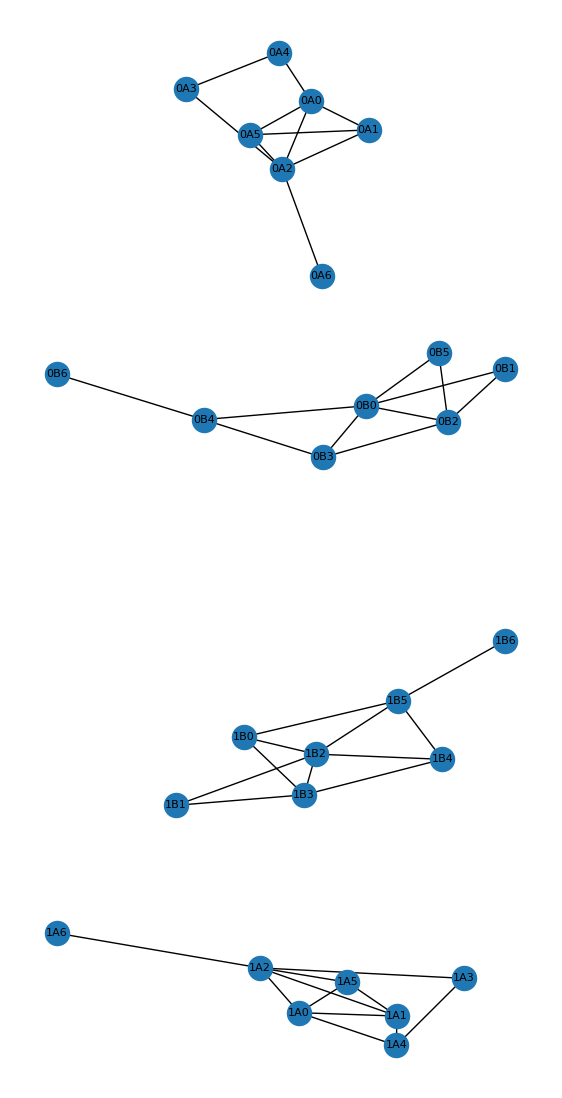

In [17]:
fig, axs = plt.subplots(nrows=len(lottery_tickets), figsize=(7, 7*len(lottery_tickets)))
for i, ticket in enumerate(lottery_tickets):
    newgraph = nx.union(megadataset[0][ticket[1]], megadataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=20)
    #plt.figure(figsize=(7,7)) 
    #axs[i].imshow()
    nx.draw(newgraph, pos,  with_labels=True, font_size=8, ax=axs[i])

## The opposite game: searching for collisions.     

In [46]:
def count_collisions(grafetto):
    histogram = {kcorre_name : 0 for kcorre_name in kcorre_names}
    histogram['1orbit-0-corre-dict'] = 0
    hits = []
    for node in grafetto.nodes():
        #print(grafetto.in_degree(node))
        if grafetto.in_degree(node)>1:
            histogram['1orbit-{}-corre-dict'.format(node[0])] +=  grafetto.in_degree(node)  # is this right? consider {1,2,3,4} -> {1,2,3}, {4} or {1,2,3,4} -> {1,2}, {3}, 
            hits.append(node)
    return histogram, hits

# note very well that we do not use main_G anymore!!!!!!!!! we should use the original graph!! 
histogram, hits = count_collisions(G)      

pprint.pprint(histogram)
print("Recall the number of nodes is ", main_G.number_of_nodes())
print("Recall the number of hits is ", len(hits))
print("Recall the number of graphs is ", len(megadataset[0]))
try:
    lottery_ticket = random.choice(hits)
except Exception as e:
    print("Cannot find a lottery ticket:", e)

{'1orbit-0-corre-dict': 0,
 '1orbit-2-corre-dict': 0,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 2,
 '1orbit-5-corre-dict': 3,
 '1orbit-6-corre-dict': 14,
 '1orbit-7-corre-dict': 392}
Recall the number of nodes is  5623
Recall the number of hits is  108
Recall the number of graphs is  1044


## Let's look at the edges that are in the graph but not in the tree.